In [3]:
import numpy as np
import pandas as pd
from sklearn.utils import check_array
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

#### Setup gradient boosting model for feature contribution tracking

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
diabetes_data = load_diabetes()
X_data, y_data = diabetes_data.data, diabetes_data.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)


params = {
    "n_estimators": 10,
    "max_depth": 4,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

gbr = GradientBoostingRegressor(**params)
gbr.fit(X_train, y_train)
gbr

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=10)

#### Accessing each tree in the regression tree ensemble

In [7]:
from feature_tracker import RegressorTreeProcessor
rtp = RegressorTreeProcessor(gbr)
rtp.track_tree_prediction(0, X_test)
# rtp.predict_with_tree(0, X_test)

[(8, -0.0037611760199069977),
 (2, 0.06870198622345924),
 (9, 0.03413021191954613),
 (2, -0.020756417885422707)]

#### Comparing with normal feature importances

Text(0.5, 1.0, 'Feature Importance (MDI)')

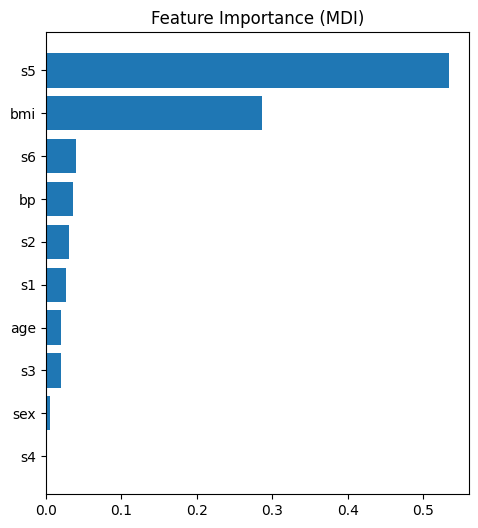

In [32]:
import matplotlib.pyplot as plt
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes_data.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

### Heavy Inspiration
#### https://github.com/suinleelab/treeexplainer-study
#### https://github.com/chucheria/feature_contribution/tree/ft_contribution_v1.0